In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
filepath = 'cereal.csv'

cereals = pd.read_csv(filepath)

In [3]:
df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
print("Dataset Columns and rows:", df.shape)
print("Dataset size:", df.size)

Dataset Columns and rows: (77, 16)
Dataset size: 1232


In [6]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


<Axes: title={'center': 'Overall Cereals Data Distribution'}, ylabel='Count'>

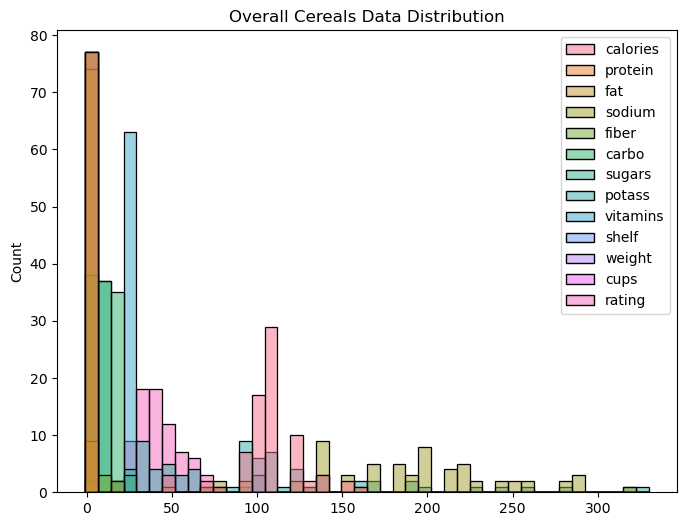

In [7]:
plt.figure(figsize=(8,6))
plt.title("Overall Cereals Data Distribution")
sns.histplot(data = cereals)

In [8]:
cereals.isnull().any()

name        False
mfr         False
type        False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo       False
sugars      False
potass      False
vitamins    False
shelf       False
weight      False
cups        False
rating      False
dtype: bool

In [9]:
cereals.duplicated().any()


False

In [10]:
def plot_histogram(column_data, column_name):
    plt.figure(figsize=(5, 3))
    plt.title(f"Distribution of {column_name}")
    sns.histplot(column_data, kde=True) 
    plt.show()

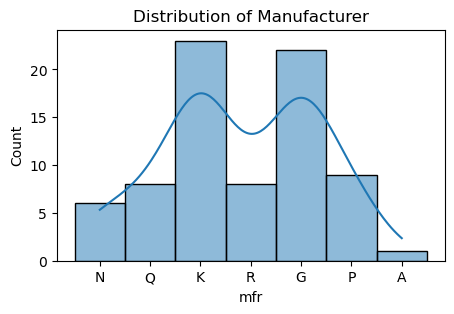

In [11]:
plot_histogram(cereals['mfr'], 'Manufacturer')

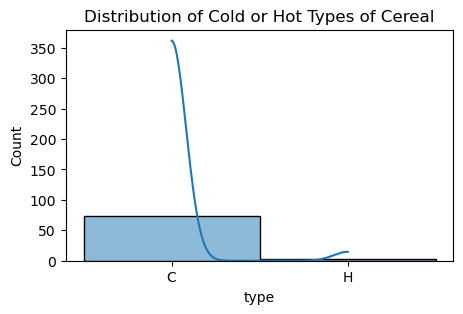

In [12]:
plot_histogram(cereals['type'], 'Cold or Hot Types of Cereal')

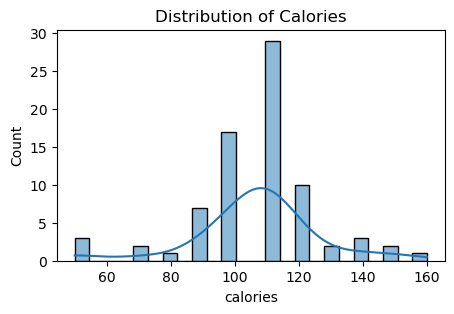

In [13]:
plot_histogram(cereals['calories'], 'Calories')


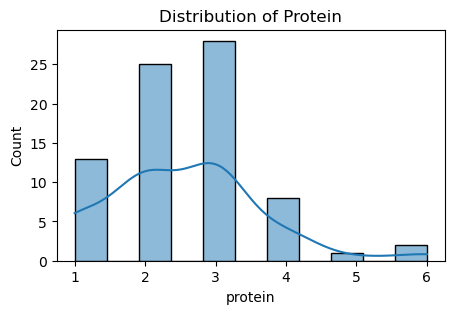

In [14]:
plot_histogram(cereals['protein'], 'Protein')

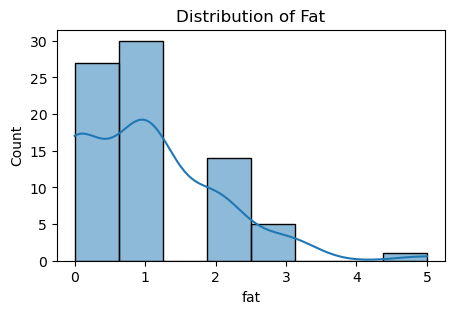

In [15]:
plot_histogram(cereals['fat'], 'Fat')


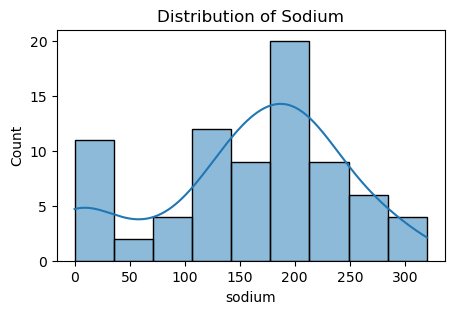

In [16]:
plot_histogram(cereals['sodium'], 'Sodium')


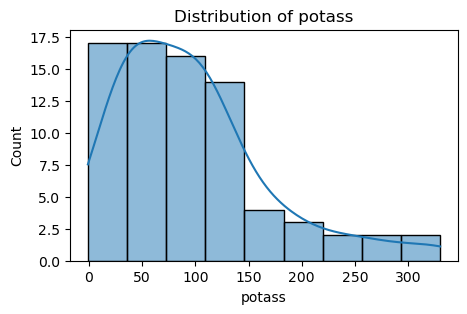

In [17]:
plot_histogram(cereals['potass'], 'potass')


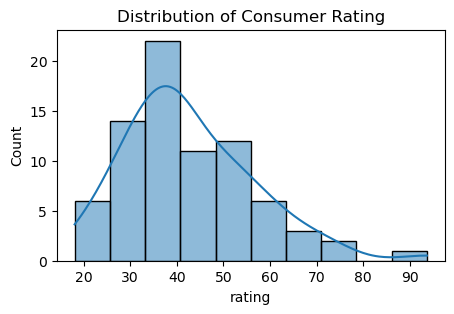

In [18]:
plot_histogram(cereals['rating'], 'Consumer Rating')

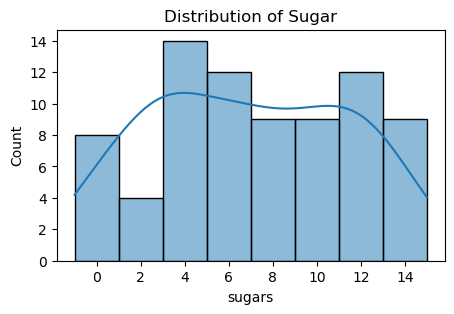

In [19]:
plot_histogram(cereals['sugars'], 'Sugar')

In [21]:
features = ['calories','protein','fat','sodium','fiber','carbo','sugars','weight',]
x = df[features]
y = df['rating']
x.shape, y.shape

((77, 8), (77,))

In [28]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=80)
y_test.shape

(20,)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [30]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9934779670066929


In [31]:
#Year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data = np.array([[120,3,5,15,2,8,8,1]])

prediction = lr.predict(input_data)
print('Estimasi nilai weaght di dalam creal :', prediction)


Estimasi nilai weaght di dalam creal : [33.72968321]


c:\Users\bdgarmi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

filename = 'estimasi_creal.sav'
pickle.dump(lr,open(filename,'wb'))